*Use this notebook to complete the sentence similarity and embedding visualization tasks.*


## TASK A) SENTENCE SIMILARITY
### GLOBAL SETUP

In [1]:
import pickle

import numpy as np
import nltk
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize

def tokenize_text(text):
    return word_tokenize(text.lower())


[nltk_data] Downloading package punkt_tab to C:\Users\Fauzan
[nltk_data]     Aryaputra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
sentences = [
    "The cat sat on the mat.",
    "A dog is playing in the yard.",
    "I need to buy groceries today.",
    "The feline was resting on the rug.",
    "Canines enjoy outdoor activities.",
    "My shopping list includes milk and bread.",
    "The weather is beautiful today.",
    "Programming requires logical thinking."
]

# Query sentence
query = "My pet cat is sleeping on the carpet."

In [2]:
def sentence_embedding(text, embeddings, word2idx):
    tokens = tokenize_text(text)
    vectors = []

    for token in tokens:
        if token in word2idx:
            idx = word2idx[token]
            vectors.append(embeddings[idx])

    return np.mean(vectors, axis=0)

In [3]:
def cosine_sim(a, b):
    a = np.asarray(a)
    b = np.asarray(b)
    return float(np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b) + 1e-8))

In [4]:
def calculate_similarities(query, sentences, embeddings, word2idx):
    query_emb = sentence_embedding(query, embeddings, word2idx)
    print(f"Query: {query}\n")

    for s in sentences:
        s_emb = sentence_embedding(s, embeddings, word2idx)
        sim = cosine_sim(query_emb, s_emb)
        print(f"Sentence: {s}\nCosine Similarity: {sim:.4f}\n")

### PyTorch Skip-Gram

In [5]:
with open('word2vec_embeddings.pkl', 'rb') as f:
    data_pt = pickle.load(f)

embeddings_pt = data_pt['embeddings']      # shape: (vocab_size, dim)
word2idx_pt = data_pt['word2idx']
idx2word_pt = data_pt['idx2word']

In [18]:
calculate_similarities(query, sentences, embeddings_pt, word2idx_pt)

Query: My pet cat is sleeping on the carpet.

Sentence: The cat sat on the mat.
Cosine Similarity: 0.4384

Sentence: A dog is playing in the yard.
Cosine Similarity: 0.4091

Sentence: I need to buy groceries today.
Cosine Similarity: 0.2967

Sentence: The feline was resting on the rug.
Cosine Similarity: 0.3390

Sentence: Canines enjoy outdoor activities.
Cosine Similarity: 0.1986

Sentence: My shopping list includes milk and bread.
Cosine Similarity: 0.4592

Sentence: The weather is beautiful today.
Cosine Similarity: 0.3817

Sentence: Programming requires logical thinking.
Cosine Similarity: 0.1358



#### Comments

No sentence is particularly strongly similar, though the sentence embeddings do understand that there are topics that are quite dissimilar (the last one). Does not do very well with less common words like feline or canine, and seems to nonsensically attribute the shopping list sentence to a higher similarity relatively (but still a lower overall distribution of similarities, especially compared to other ones). Reflects the relatively small corpus and low dimensionality - especially with the trucated training we performed in the training file.

### GenSim Word2Vec

In [6]:
with open('word2vec_gensim_embeddings.pkl', 'rb') as f:
    data_gs = pickle.load(f)

embeddings_gs = data_gs['embeddings']      # shape: (vocab_size, dim)
word2idx_gs = data_gs['word2idx']
idx2word_gs = data_gs['idx2word']

In [20]:
calculate_similarities(query, sentences, embeddings_gs, word2idx_gs)

Query: My pet cat is sleeping on the carpet.

Sentence: The cat sat on the mat.
Cosine Similarity: 0.7095

Sentence: A dog is playing in the yard.
Cosine Similarity: 0.6085

Sentence: I need to buy groceries today.
Cosine Similarity: 0.2279

Sentence: The feline was resting on the rug.
Cosine Similarity: 0.4865

Sentence: Canines enjoy outdoor activities.
Cosine Similarity: 0.0806

Sentence: My shopping list includes milk and bread.
Cosine Similarity: 0.4698

Sentence: The weather is beautiful today.
Cosine Similarity: 0.5011

Sentence: Programming requires logical thinking.
Cosine Similarity: 0.0779



#### Comments

Does much better than the last model in terms of identifying commonly used words and their similarity, and good at identiying obviously dissimilar sentences. Definitely struggles with lesser used words that are similar, especially seen in the feline-resting-rug sentence (which should really be more similar than the cat-sat-mat sentence). Reflects the relatively small corpus the model was trained on.

### Gensim Word2Vec (Google)

In [7]:
from gensim.models import KeyedVectors

model_google = KeyedVectors.load("word2vec-google-news-300.model")

In [8]:
embeddings_google = model_google.vectors
word2idx_google = model_google.key_to_index
idx2word_google = model_google.index_to_key

In [24]:
calculate_similarities(query, sentences, embeddings_google, word2idx_google)

Query: My pet cat is sleeping on the carpet.

Sentence: The cat sat on the mat.
Cosine Similarity: 0.7369

Sentence: A dog is playing in the yard.
Cosine Similarity: 0.6483

Sentence: I need to buy groceries today.
Cosine Similarity: 0.3718

Sentence: The feline was resting on the rug.
Cosine Similarity: 0.7794

Sentence: Canines enjoy outdoor activities.
Cosine Similarity: 0.4281

Sentence: My shopping list includes milk and bread.
Cosine Similarity: 0.4970

Sentence: The weather is beautiful today.
Cosine Similarity: 0.4310

Sentence: Programming requires logical thinking.
Cosine Similarity: 0.2979



#### Comments

Does well with rating the feline sentence higher, but the distribution of cosine similarities is higher than the other embedding models, which can be attributed to higher dimensionality without the corresponding required increase in model power. Still performs quite well, would argue that it's the best out of all of them.

### Gensim FastText

In [9]:
model_ft = KeyedVectors.load("fasttext-wiki-news-subwords-300.model")

embeddings_ft = model_ft.vectors
word2idx_ft = model_ft.key_to_index
idx2word_ft = model_ft.index_to_key

In [26]:
calculate_similarities(query, sentences, embeddings_ft, word2idx_ft)

Query: My pet cat is sleeping on the carpet.

Sentence: The cat sat on the mat.
Cosine Similarity: 0.9114

Sentence: A dog is playing in the yard.
Cosine Similarity: 0.8512

Sentence: I need to buy groceries today.
Cosine Similarity: 0.5858

Sentence: The feline was resting on the rug.
Cosine Similarity: 0.9247

Sentence: Canines enjoy outdoor activities.
Cosine Similarity: 0.6504

Sentence: My shopping list includes milk and bread.
Cosine Similarity: 0.8350

Sentence: The weather is beautiful today.
Cosine Similarity: 0.8090

Sentence: Programming requires logical thinking.
Cosine Similarity: 0.6135



#### Comments

Distribution of cosine similarities are much higher - even though it's able to identify sentences that are very similar, it "means" less because the cosine similarity for very dissimilar sentences are quite high as well.

## TASK B) Embedding Viz


In [10]:
animals = [
    'dog', 'cat', 'horse', 'cow',
    'lion', 'tiger', 'elephant', 'giraffe',
    'eagle', 'hawk', 'sparrow', 'penguin',
    'shark', 'whale', 'dolphin', 'tuna'
]

foods = [
    'apple', 'orange', 'banana', 'grape',
    'bread', 'pasta', 'rice', 'potato',
    'chicken', 'beef', 'pork', 'fish',
    'coffee', 'tea', 'juice', 'water'
]

labels = ['animal'] * len(animals) + ['food'] * len(foods)
words = animals + foods

In [17]:
def get_embeddings(words, source, word2idx = None):
    vectors = []

    if word2idx is not None:
        embeddings = source
        for word in words:
            idx = word2idx[word]
            vectors.append(embeddings[idx])
    else:
        model = source
        for word in words:
            vectors.append(model[word])
            
    return np.array(vectors)

In [ ]:
import umap
from sklearn.manifold import TSNE

In [20]:
def tsne_2d(X):
    tsne = TSNE(n_components=2, perplexity = 10, random_state = 17, init='pca')
    X_2d = tsne.fit_transform(X)
    return X_2d

def umap_2d(X):
    reducer = umap.UMAP(n_components=2, n_neighbors = 10, min_dist = 0.1)
    X_2d = reducer.fit_transform(X)
    return X_2d

In [14]:
import matplotlib.pyplot as plt

def plot_2d(X_2d, words, labels, title):

    plt.figure(figsize=(8, 6))

    unique_labels = sorted(set(labels))

    for label in unique_labels:
        indices = [i for i, l in enumerate(labels) if l == label]
        plt.scatter(X_2d[indices, 0], X_2d[indices, 1], label=label)

        for i in indices:
            plt.text(X_2d[i, 0], X_2d[i, 1], words[i], fontsize=9)

    plt.title(title)
    plt.legend()
    plt.show()

### PyTorch

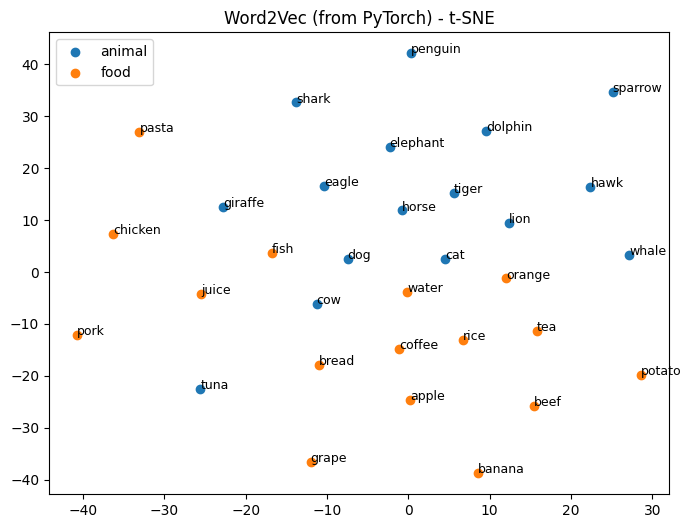

c:\Users\Fauzan Aryaputra\STAT 359\stat359\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


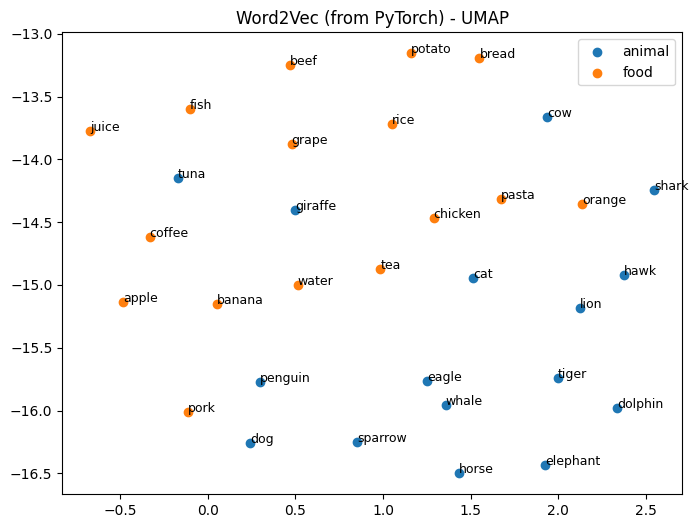

In [ ]:
X_pt = get_embeddings(words, embeddings_pt, word2idx = word2idx_pt)
X_pt_tsne = tsne_2d(X_pt)
plot_2d(X_pt_tsne, words, labels, "Word2Vec (from PyTorch) - t-SNE")
X_pt_umap = umap_2d(X_pt)
plot_2d(X_pt_umap, words, labels, "Word2Vec (from PyTorch) - UMAP")

### Gensim Word2Vec

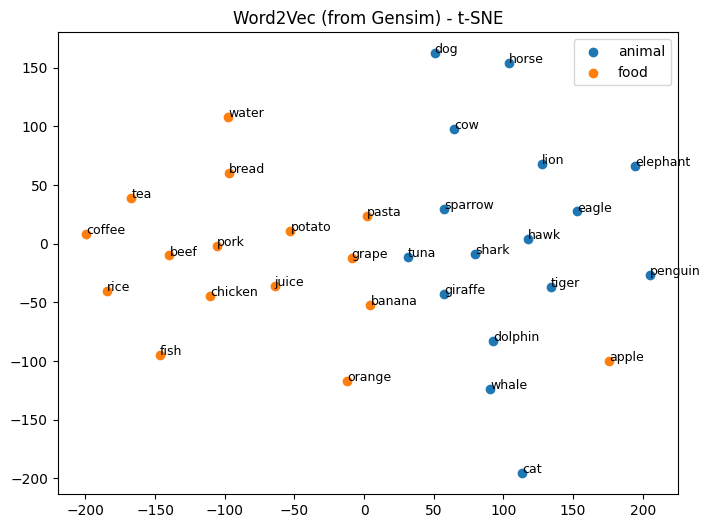

c:\Users\Fauzan Aryaputra\STAT 359\stat359\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


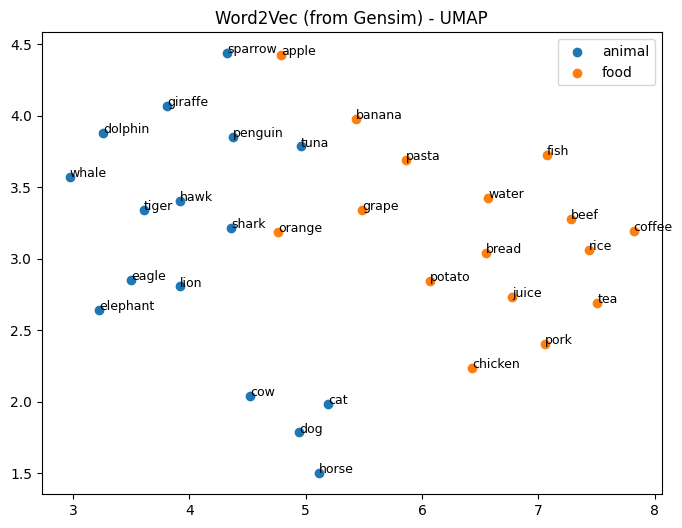

In [22]:
X_gs = get_embeddings(words, embeddings_gs, word2idx = word2idx_gs)
X_gs_tsne = tsne_2d(X_gs)
plot_2d(X_gs_tsne, words, labels, "Word2Vec (from Gensim) - t-SNE")
X_gs_umap = umap_2d(X_gs)
plot_2d(X_gs_umap, words, labels, "Word2Vec (from Gensim) - UMAP")

### Gensim Word2Vec (Google)



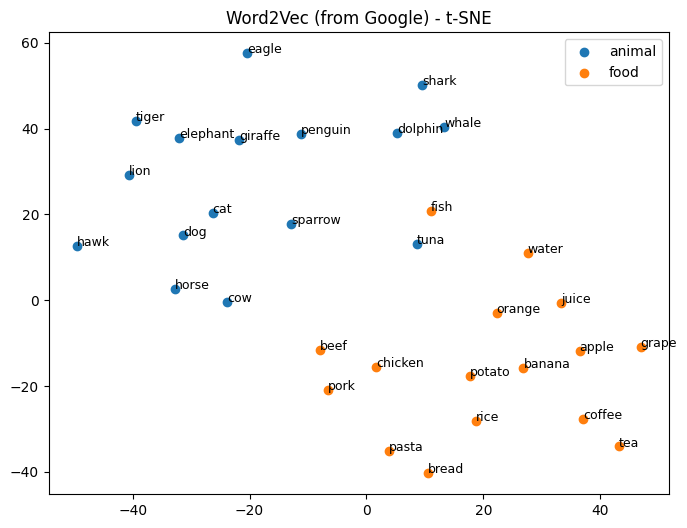

c:\Users\Fauzan Aryaputra\STAT 359\stat359\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


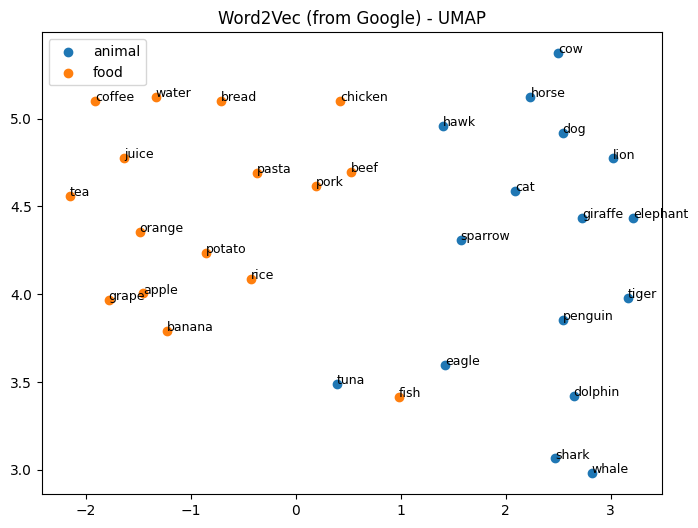

In [23]:
X_google = get_embeddings(words, model_google)
X_google_tsne = tsne_2d(X_google)
plot_2d(X_google_tsne, words, labels, "Word2Vec (from Google) - t-SNE")
X_google_umap = umap_2d(X_google)
plot_2d(X_google_umap, words, labels, "Word2Vec (from Google) - UMAP")

### Gensim FastText

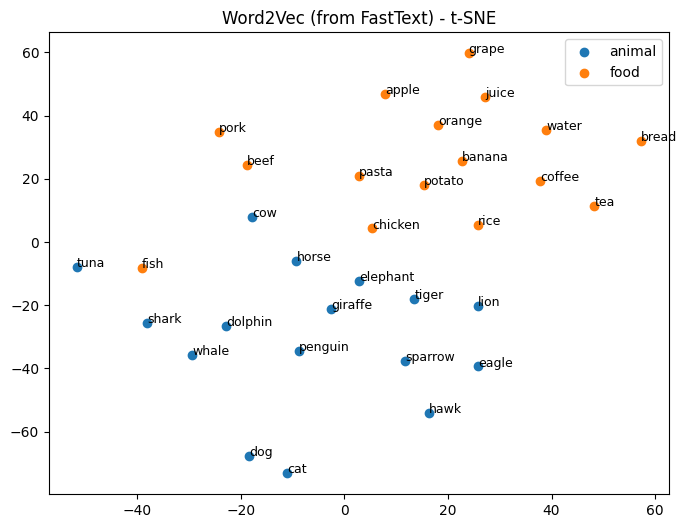

c:\Users\Fauzan Aryaputra\STAT 359\stat359\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


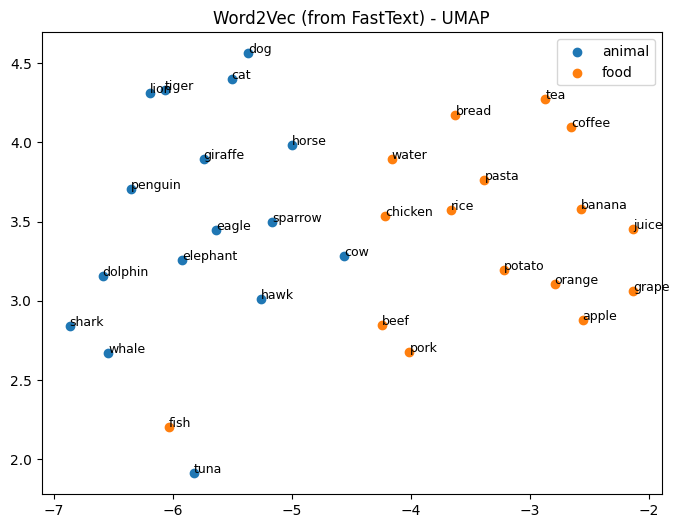

In [24]:
X_ft = get_embeddings(words, model_ft)
X_ft_tsne = tsne_2d(X_ft)
plot_2d(X_ft_tsne, words, labels, "Word2Vec (from FastText) - t-SNE")
X_ft_umap = umap_2d(X_ft)
plot_2d(X_ft_umap, words, labels, "Word2Vec (from FastText) - UMAP")

### Task B Comments

In general, as we move higher in dimensionality and corpus size, we see a better distinction between the two class labels. Some standouts to keep track of as we move through the models is how the embeddings encode the animals that are commonly eaten as food (e.g., chicken), and the meat names for certain animals (e.g., cow-beef), both of which seem to meet each other at the boundary throughout all the models (which makes sense, as they are semantically very similar). 

PyTorch:
Across the both t-SNE and PCA, the distribution of the reduced embeddings are still quite spread out; there seems to be some semblance of a boundary but it's not as strong as the other embedding models and it tends to bleed quite a bit as well. Another interesting shortcoming is that the model fails to goup similar words within classes as well; for instance, all the different birds are quite far apart in both graphs. The spread-outness of the data may be a function of a misunderstanding of hyperparameter tuning for this specific embedding model.

Gensim W2V:
Much better separation between classes, and definitely more compact, but it does fail quite interestingly with some of the fruits (i.e., apple and orange), which bleed deep into animal territory. May just be a function of mistuned hyperparameters, but is probably due to the lower number of dimensions, especially compared to the models with 300-dimensions.

Gensim Google:
Model performs incredibly well, as there is not only a boundary but a very clear space between both label classes, only somewhat failing at the fish-tuna boundary. Does a decent job of within-class grouping as well, as all the fruits are clustered and all the sea predators are also clustered.

Gensim FastText:
Similar performance to Gensim Google, with similar characteristics across both plots as well.

## Short Answer Questions:

**Which embeddings performed best at capturing sentence meaning?**

Would say the Gensim Google and the Gensim FastText performed the best, with the Gensim Google model slightly outperforming the FastText in sentence understanding purely due to the wider distribution of sentence similarities - it performs better at distinguishing what is similar and what is not. This makes sense, as FastText's characteristics of smoothing representations and increasing the similarity between morphologically similar words shifts the distribution upward, but since cosine similarity is capped, it's squashed together.

**Were the pretrained embeddings significantly better than your own? Why or why not?**

Much better across the board! The performance gap is probably due to differences in the scale and diversity of the corpora: the pretrained models were trained on massive datasets compared to text8, which exposes them to a wider range of linguistic contexts and co-occurence patterns. Embeddings trained on text8 are limmited in size and domain, by contrast. 


**What factors might explain the differences in performance?**

In addition to the factors I mentioned in the last question, differencces in training objectives and optimization strategies may have also played a big role in the difference in performace: mature, well-thought implementations (as opposed to my first attempt at creating an embedding model) use well-tuned hyperparameters and better training procedures suitable for the large text corpora upon whih it is trainned. Additionally, architectural differences contribute a lot like in FastText, where subword information impacts other embeddings and thus generalizes better to morpholohically related words.


## AI Use Disclosure (Required)

If you used any AI-enabled tools (e.g., ChatGPT, GitHub Copilot, Claude, or other LLM assistants) while working on this assignment, you must disclose that use here. The goal is transparency-not punishment.

In your disclosure, briefly include:
- **Tool(s) used:** (name + version if known)
- **How you used them:** (e.g., concept explanation, debugging, drafting code, rewriting text)
- **What you verified yourself:** (e.g., reran the notebook, checked outputs/plots, checked shapes, read documentation)
- **What you did *not* use AI for (if applicable):** (optional)

You are responsible for the correctness of your submission, even if AI suggested code or explanations.

#### <font color="red">Write your disclosure here.</font>

- GPT 5.2
- Used quite a bit in figuring out my poetry, especially with installing the cuda-enabled version of torch and other things. Helped to debug my training loop for my implementation, where I didn't realize I had an infinite loop and training was not occurring at all. Helped me understand some concepts, such as what negative sampling does and how I should approach implementing it. Checked my code against it as well, to make sure it was at least sort of doing the right thing.
- Made sure to understand any of its suggestions, never copied 1-to-1. Read documentation for the poetry stuff.
